In [1]:
import pymmcore_plus

In [2]:
# Initialize microscope
core = pymmcore_plus.CMMCorePlus.instance()

# load the configuration of the microscope
# Give the .gft file with the specific configuration
core.loadSystemConfiguration()

# print loaded devices
print(core.getLoadedDevices())

('DHub', 'Camera', 'Dichroic', 'Emission', 'Excitation', 'Objective', 'Z', 'Path', 'XY', 'White Light Shutter', 'Autofocus', 'LED', 'LED Shutter', 'Core')


In [10]:
core.describe()

MMCore version 11.2.1, Device API version 71, Module API version 10
Adapter path: C:\Users\dario\AppData\Local\pymmcore-plus\pymmcore-plus\mm\Micro-Manager_2.0.3_20250219


┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Device Label        ┃ Type         ┃ Current   ┃ Library::DeviceName            ┃ Description                   ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ DHub                │ 🔌 Hub       │           │ DemoCamera::DHub               │ DHub                          │
│ Camera              │ 📷 Camera    │ Camera    │ DemoCamera::DCam               │ Demo camera                   │
│ Dichroic            │ 🟢 State     │           │ DemoCamera::DWheel             │ Demo filter wheel             │
│ Emission            │ 🟢 State     │           │ DemoCamera::DWheel             │ Demo filter wheel             │
│ Excitation          │ 🟢 State     │           │ DemoCamera::DWheel             │ Demo filter wheel             │
│ Objective           │ 🟢 State     │           │ DemoCamera::DObjective         │ Demo objective turret         │
│ Z                   │ ⬆  Stage     │ Focus     │ DemoCamera::DStage             │ Demo stage                    │
│ Path                │ 🟢 State     │           │ DemoCamera::DLightPath         │ Demo light path               │
│ XY                  │ 🕹  XYStage   │ XYStage   │ DemoCamera::DXYStage           │ Demo XY stage                 │
│ White Light Shutter │ 💡 Shutter   │ Shutter   │ DemoCamera::DShutter           │ Demo shutter                  │
│ Autofocus           │ 〰 AutoFocus │ AutoFocus │ DemoCamera::DAutoFocus         │ Demo auto focus               │
│ LED                 │ 🟢 State     │           │ DemoCamera::DStateDevice       │ Demo State Device             │
│ LED Shutter         │ 💡 Shutter   │           │ Utilities::State Device        │ State device used as a        │
│                     │              │           │ Shutter                        │ shutter                       │
│ Core                │ 💙 Core      │           │ ::Core                         │ Core device                   │
└─────────────────────┴──────────────┴───────────┴────────────────────────────────┴───────────────────────────────┘

The adapter is ?

In [11]:
core.getDeviceName("Camera")

'DCam'

In [12]:
core.getYPosition()

-0.0

In [13]:
core.getAutoShutter()

True

In [30]:
class AutoShutterHandler:
    def __init__(self, core):
        self.core = core
        self.auto_shutter_state = None
        self.core.events.autoShutterSet.connect(self.set_auto_shutter)
        print("Callback connected.")

    def set_auto_shutter(self, set_auto: bool):
        self.auto_shutter_state = set_auto
        print(f"[Callback] Auto shutter set to: {set_auto}")

    def disconnect(self):
        self.core.events.autoShutterSet.disconnect(self.set_auto_shutter)
        print("Callback disconnected.")

In [31]:
# connect the event
handler = AutoShutterHandler(core)
# change value of event shutter
core.setAutoShutter(False)
# check the new value
print(handler.auto_shutter_state)
# new event
core.setAutoShutter(True)
# check new value
print(handler.auto_shutter_state)
# new event
core.setAutoShutter(False)
# disconnect handler
handler.disconnect()
# try to triggger callback
core.setAutoShutter(False)
# value remains as last event value
print(handler.auto_shutter_state)

Callback connected.
[Callback] Auto shutter set to: False
False
[Callback] Auto shutter set to: True
True
[Callback] Auto shutter set to: False
Callback disconnected.
False


In [32]:
core.getChannelGroup()

'Camera'

In [33]:
core.getAvailableConfigGroups()

('Camera', 'Channel', 'Channel-Multiband', 'LightPath', 'Objective', 'System')

In [38]:
class ChannelGroupHandler:
    def __init__(self, core):
        self.core = core
        self.channel_group_state = None
        self.core.events.channelGroupChanged.connect(self.set_channel_group)
        print("Callback connected.")

    def set_channel_group(self,newChannelGroupName: str):
        self.channel_group_state = newChannelGroupName
        print(f"[Callback] Group Channel set to: {newChannelGroupName}")

    def disconnect(self):
        self.core.events.channelGroupChanged.disconnect(self.set_channel_group)
        print("Callback disconnected.")

In [39]:
# get current Group Channel
print(core.getChannelGroup())
# connect new handler
handler_channel = ChannelGroupHandler(core)
# set new channel group
core.setChannelGroup('Channel')
# check the state
handler_channel.channel_group_state
# set new channel
core.setChannelGroup('Camera')
# check the state
handler_channel.channel_group_state
# disconnect the channel handler
handler_channel.disconnect()

Camera
Callback connected.
[Callback] Group Channel set to: Channel
[Callback] Group Channel set to: Channel
[Callback] Group Channel set to: Camera
[Callback] Group Channel set to: Camera
Callback disconnected.


In [43]:
core.setChannelGroup('LightPath')

In [44]:
handler_channel.channel_group_state

'Camera'

In [3]:
core.getAvailableConfigs('Camera')

('HighRes', 'LowRes', 'MedRes')

In [4]:
core.getConfigData('Camera', 'HighRes').dict()

{'Camera': {'Binning': '1', 'BitDepth': '12'}}

In [5]:
core.getAvailableConfigs('Channel')

('Cy5', 'DAPI', 'FITC', 'Rhodamine')

In [6]:
core.getConfigData('Channel', 'Cy5').dict()

{'Dichroic': {'Label': '400DCLP'},
 'Emission': {'Label': 'Chroma-HQ700'},
 'Excitation': {'Label': 'Chroma-HQ570'},
 'Core': {'Shutter': 'White Light Shutter'}}

In [7]:
core.getConfigGroupState('Channel').dict()

{'Dichroic': {'Label': '400DCLP'},
 'Emission': {'Label': 'Chroma-HQ620'},
 'Excitation': {'Label': 'Chroma-D360'},
 'Core': {'Shutter': 'White Light Shutter'}}

In [8]:
core.getCurrentConfig('Channel')

'DAPI'

In [9]:
core.getAvailableConfigs('Channel')

('Cy5', 'DAPI', 'FITC', 'Rhodamine')

In [9]:
class ConfigurationHandler:

    def __init__(self, core):
        self.core = core
        self.config_set_state = None
        self.config_delete_state = None
        self.config_define_state = None
        #self.config_group_change_state = None
        self.config_group_delete_state = None
        self.core.events.configSet.connect(self.config_set)
        self.core.events.configDeleted.connect(self.config_delete)
        self.core.events.configDefined.connect(self.config_define)
        self.core.events.configGroupDeleted.connect(self.config_group_deleted)
        print("Callback connected")

    def config_set(self, groupName: str, configName: str):
        self.config_set_state = (groupName,configName) # f'The config group {groupName} has the new configuration {configName}'
        print(f'[Callback] The config group {groupName} has the new configuration {configName}')

    def config_delete(self, groupName: str, configName: str):
        # one can delete the complete config or just a specific property
        # check every time with core.getAvailableConfigs(groupName)
        self.config_delete_state = (groupName,configName)
        print(f'[Callback] The config group {groupName} with the configuration {configName} was deleted.')

    def config_define(self, groupName: str, configName: str, deviceLabel: str, propertyName: str, value: str):
        self.config_define_state = (groupName, configName, deviceLabel, propertyName, value)
        print(f'[Callback] The new configuration ({groupName}, {configName}, {deviceLabel}, {propertyName}, {value}) was defined.')

    def config_group_deleted(self, groupName: str):
        self.config_group_delete_state = groupName
        print(f'The config group {groupName} was deleted')

    def disconnect(self):
        self.core.events.configSet.disconnect(self.config_set)
        self.core.events.configDeleted.disconnect(self.config_delete)
        self.core.events.configDefined.disconnect(self.config_define)
        self.core.events.configGroupDeleted.disconnect(self.config_group_deleted)

In [31]:
# get available configuration Group
print(core.getAvailableConfigGroups())

# get available configs for channel
print(core.getAvailableConfigs('Channel'))

# initialize callback
handler_config = ConfigurationHandler(core)

# get current config for Channel
print(core.getCurrentConfig('Channel'))

# set new config for channel
core.setConfig('Channel', 'FITC')

# check new value for config
print(core.getCurrentConfig('Channel'))

# access value in the handler
print(handler_config.config_set_state)

# set new value config for channel
core.setConfig('Channel', 'Cy5')

# check new value for config
print(core.getCurrentConfig('Channel'))

# disconnect callback
handler_config.disconnect()

# set new config
core.setConfig('Channel', 'DAPI')

# check that the callback value didn't change
print(handler_config.config_set_state)

('Camera', 'Channel', 'Channel-Multiband', 'LightPath', 'Objective', 'System')
('Cy5', 'DAPI', 'FITC', 'Rhodamine')
Callback connected
DAPI
[Callback] The config group Channel has the new configuration FITC
FITC
The config group Channel has the new configuration FITC
[Callback] The config group Channel has the new configuration Cy5
Cy5
The config group Channel has the new configuration Cy5


In [145]:
core.getConfigGroupObject('Channel')

ConfigGroup(presets=['FITC', 'Rhodamine'], n_properties=4)

In [11]:
# delete a configuration group
def config_group_deleted(var: str):
    print(f'The config group {var} was deleted')

In [25]:
core.events.configGroupDeleted.disconnect(config_group_deleted)

In [21]:
core.defineConfigGroup('Test')

In [22]:
core.getAvailableConfigGroups()

('Camera',
 'Channel',
 'Channel-Multiband',
 'LightPath',
 'Objective',
 'System',
 'Test')

In [23]:
try: 
    core.deleteConfigGroup('Test')
except:
    pass

The config group Test was deleted


In [24]:
core.getAvailableConfigGroups()

('Camera', 'Channel', 'Channel-Multiband', 'LightPath', 'Objective', 'System')

In [150]:
core.getAvailableConfigGroups()

('Camera', 'Channel', 'LightPath', 'Objective', 'System')

In [131]:
handler_delete_config = ConfigurationHandler(core)

Callback connected


In [12]:
core.getCurrentConfig('Channel')

'DAPI'

In [29]:
core.setConfig('Channel', 'DAPI')

In [48]:
core.getConfigData('Channel', 'DAPI').dict()

{'Dichroic': {'Label': '400DCLP'},
 'Emission': {'Label': 'Chroma-HQ620'},
 'Excitation': {'Label': 'Chroma-D360'},
 'Core': {'Shutter': 'White Light Shutter'}}

In [128]:
core.getConfigData('Channel', 'FITC').dict()

{'Dichroic': {'Label': 'Q505LP'},
 'Emission': {'Label': 'Chroma-HQ535'},
 'Excitation': {'Label': 'Chroma-HQ480'},
 'Core': {'Shutter': 'White Light Shutter'}}

In [137]:
core.getConfigData('Channel', 'DAPI').dict()

{'Emission': {'Label': 'Chroma-HQ620'},
 'Excitation': {'Label': 'Chroma-D360'},
 'Core': {'Shutter': 'White Light Shutter'},
 'Dichroic': {'Label': '400DCLP'}}

In [138]:
core.deleteConfig('Channel', 'DAPI')

[Callback] The config group Channel with the configuration DAPI was deleted.


In [140]:
core.getAvailableConfigs('Channel')

('FITC', 'Rhodamine')

In [ ]:
core.deleteConfig()

In [171]:
handler_delete_config.disconnect()

In [ ]:
core.getConfigData('Channel', 'DAPI').dict()

{'Emission': {'Label': 'Chroma-HQ620'},
 'Excitation': {'Label': 'Chroma-D360'},
 'Core': {'Shutter': 'White Light Shutter'}}

[Callback] The config group Channel-Multiband has the new configuration Cy5
[Callback] The config group Channel-Multiband has the new configuration DAPI
[Callback] The config group Channel-Multiband has the new configuration DAPI


In [ ]:
core.getConfigData('Channel', 'DAPI').append

['Dichroic', 'Emission', 'Excitation', 'Core']

In [58]:
core.getDevicePropertyNames('Dichroic')

('ClosedPosition', 'Description', 'HubID', 'Label', 'Name', 'State')

In [59]:
core.getProperty('Dichroic','ClosedPosition')

'0'

In [76]:
core.getPropertyObject('Dichroic', 'Label').dict()

{'valid': True,
 'value': 'Q585LP',
 'type': 'string',
 'device_type': 'StateDevice',
 'read_only': False,
 'sequenceable': False,
 'sequence_max_length': None,
 'pre_init': False,
 'range': None,
 'allowed_values': ('400DCLP',
  '89402bs',
  'Q505LP',
  'Q585LP',
  'State-4',
  'State-5',
  'State-6',
  'State-7',
  'State-8',
  'State-9')}

In [69]:
core.getPropertyObject('Dichroic', 'State').dict()

{'valid': True,
 'value': 0,
 'type': 'integer',
 'device_type': 'StateDevice',
 'read_only': False,
 'sequenceable': False,
 'sequence_max_length': None,
 'pre_init': False,
 'range': None,
 'allowed_values': ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')}

In [62]:
core.getProperty('Dichroic', 'Description')

'Demo filter wheel driver'

In [63]:
core.getProperty('Dichroic', 'HubID')

''

In [67]:
core.getProperty('Dichroic', 'State')

'0'

In [ ]:
import useq

# create a sequence
mda_sequence = useq.MDASequence(
    time_plan={"interval": 2, "loops": 10},
    z_plan={"range": 4, "step": 0.5},
    channels=[
        {"config": "DAPI", "exposure": 50},
        {"config": "FITC", "exposure": 20},
    ]
)

# Run it!
core.run_mda(mda_sequence)

2025-02-24 17:17:31,089 - pymmcore-plus - INFO - (_runner.py:310) MDA Started: channels=(Channel(config='DAPI', exposure=50.0), Channel(config='FITC', exposure=20.0)) time_plan=TIntervalLoops(interval=datetime.timedelta(seconds=2), loops=10) z_plan=ZRangeAround(range=4.0, step=0.5)


<Thread(Thread-3, started 29040)>

2025-02-24 17:17:31,102 - pymmcore-plus - INFO - (_runner.py:278) index=mappingproxy({<Axis.TIME: 't'>: 0, <Axis.CHANNEL: 'c'>: 0, <Axis.Z: 'z'>: 0}) channel=Channel(config='DAPI') exposure=50.0 min_start_time=0.0 z_pos=-2.0 reset_event_timer=True


2025-02-24 17:17:31,157 - pymmcore-plus - INFO - (_runner.py:278) index=mappingproxy({<Axis.TIME: 't'>: 0, <Axis.CHANNEL: 'c'>: 0, <Axis.Z: 'z'>: 1}) channel=Channel(config='DAPI') exposure=50.0 min_start_time=0.0 z_pos=-1.5
2025-02-24 17:17:31,220 - pymmcore-plus - INFO - (_runner.py:278) index=mappingproxy({<Axis.TIME: 't'>: 0, <Axis.CHANNEL: 'c'>: 0, <Axis.Z: 'z'>: 2}) channel=Channel(config='DAPI') exposure=50.0 min_start_time=0.0 z_pos=-1.0
2025-02-24 17:17:31,360 - pymmcore-plus - INFO - (_runner.py:278) index=mappingproxy({<Axis.TIME: 't'>: 0, <Axis.CHANNEL: 'c'>: 0, <Axis.Z: 'z'>: 3}) channel=Channel(config='DAPI') exposure=50.0 min_start_time=0.0 z_pos=-0.5
2025-02-24 17:17:31,426 - pymmcore-plus - INFO - (_runner.py:278) index=mappingproxy({<Axis.TIME: 't'>: 0, <Axis.CHANNEL: 'c'>: 0, <Axis.Z: 'z'>: 4}) channel=Channel(config='DAPI') exposure=50.0 min_start_time=0.0 z_pos=0.0
2025-02-24 17:17:31,486 - pymmcore-plus - INFO - (_runner.py:278) index=mappingproxy({<Axis.TIME: 't'

In [30]:
core.getCameraChannelNames()

('',)

In [31]:
core.snapImage()

In [32]:
core.getImage()

array([[16383, 16068, 15752, ..., 17328, 17014, 16698],
       [16344, 16028, 15713, ..., 17289, 16974, 16659],
       [16304, 15989, 15674, ..., 17250, 16935, 16620],
       ...,
       [ 3534,  3535,  3543, ...,  3577,  3555,  3540],
       [ 3533,  3535,  3545, ...,  3574,  3553,  3539],
       [ 3533,  3536,  3547, ...,  3571,  3550,  3538]], dtype=uint16)

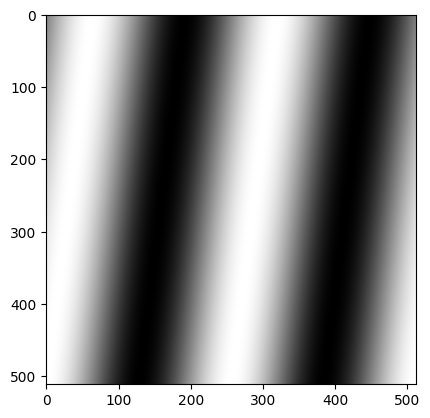

In [33]:
import matplotlib.pylab as plt


plt.imshow(core.getImage(), cmap='gray')

In [71]:
import napari

In [110]:
import napari.viewer


Viewer = napari.Viewer()

In [75]:
core.getCurrentConfig('Channel')

'Rhodamine'

In [112]:
core.deleteConfig('Channel', 'DAPI','Dichroic', 'Label')

In [106]:
core.getConfigData('Channel', 'DAPI').dict()

{'Emission': {'Label': 'Chroma-HQ620'},
 'Excitation': {'Label': 'Chroma-D360'},
 'Core': {'Shutter': 'White Light Shutter'}}

In [26]:
try:
    core.defineConfig('Channel', 'DAPI', 'Dichroic', 'Label', '400DCLP')
except:
    pass

In [27]:
core.getConfigData('Channel', 'DAPI').dict()

{'Dichroic': {'Label': '400DCLP'},
 'Emission': {'Label': 'Chroma-HQ620'},
 'Excitation': {'Label': 'Chroma-D360'},
 'Core': {'Shutter': 'White Light Shutter'}}

In [28]:
core.getPropertyObject('Dichroic', 'Label').dict()

{'valid': True,
 'value': '400DCLP',
 'type': 'string',
 'device_type': 'StateDevice',
 'read_only': False,
 'sequenceable': False,
 'sequence_max_length': None,
 'pre_init': False,
 'range': None,
 'allowed_values': ('400DCLP',
  '89402bs',
  'Q505LP',
  'Q585LP',
  'State-4',
  'State-5',
  'State-6',
  'State-7',
  'State-8',
  'State-9')}